# Machine Failure Prediction using Sensor data

## Introduction
In this project, we aimed to predict machine failures using sensor data collected from various machines. The dataset included multiple sensor readings and recorded instances of machine failures. Our goal was to build a robust predictive model and identify key factors influencing machine failures.

In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
df.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

In [6]:
df.dtypes

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

In [7]:
df.shape

(944, 10)

In [8]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


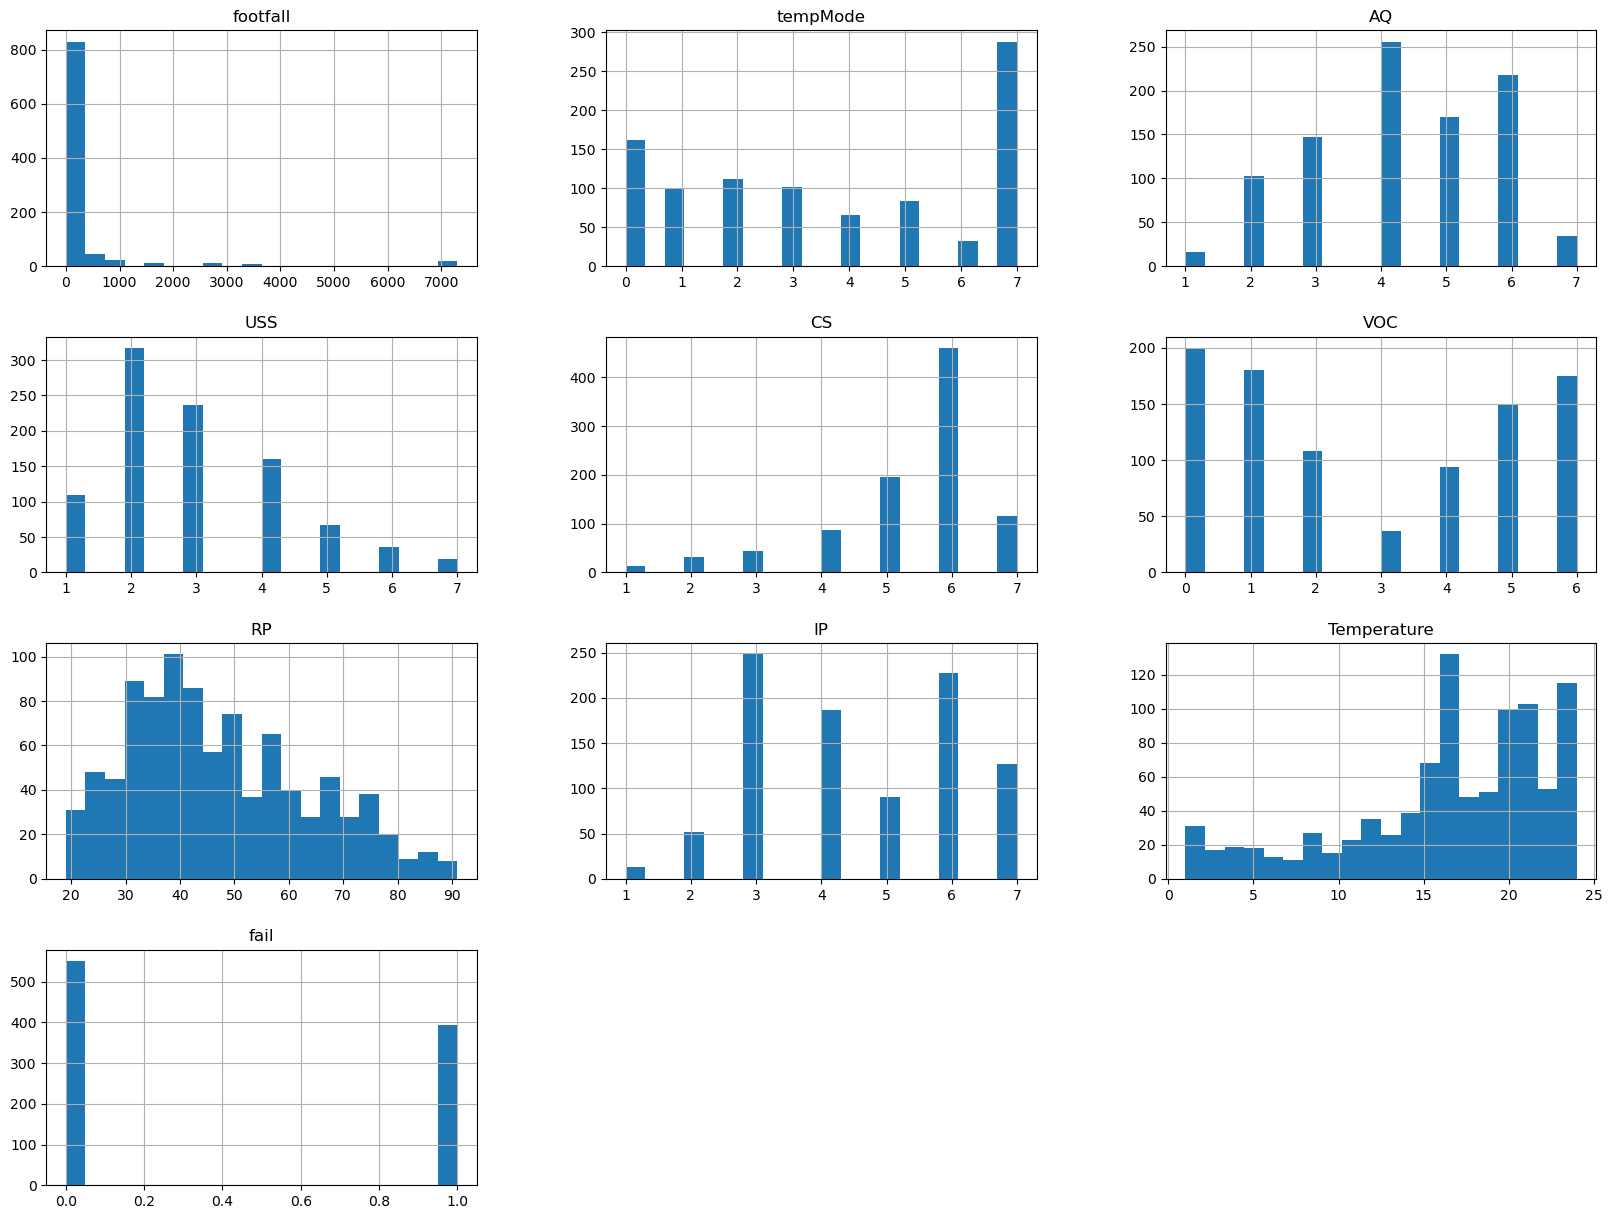

In [9]:
df.hist(bins=20, figsize=(20,15))
plt.show()

- temperatures range from 1 to 24 and there is a slight concentration around 17 and 14.
- the number of machines that doesn't fail are higher than the machines that fails.
- 

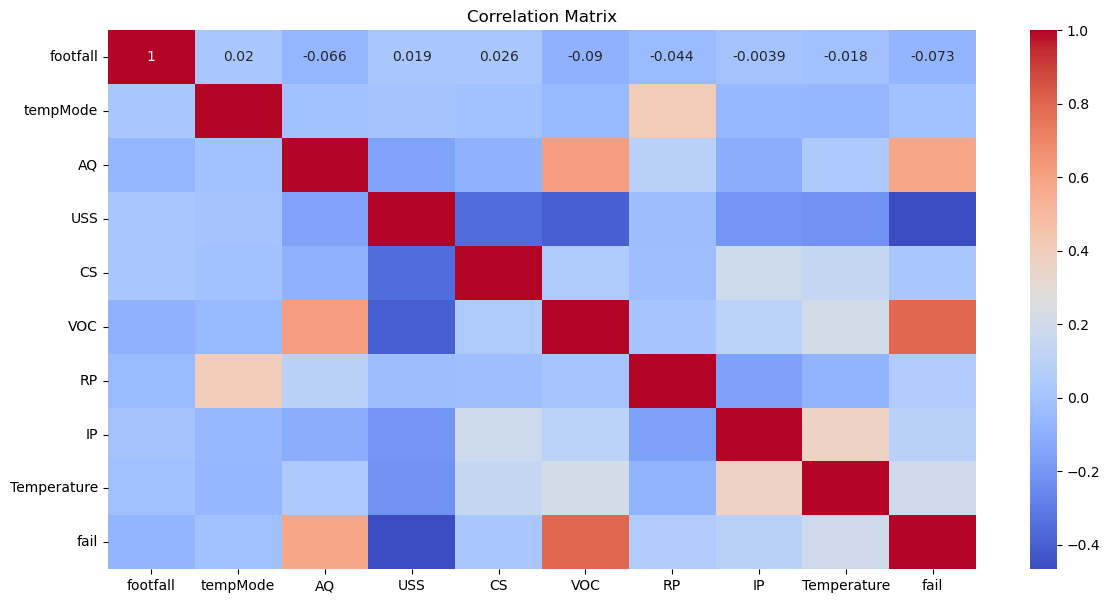

In [13]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- there is a strong correlation between fail and VOC.
- there is a good correlation between AQ and fail also between tempMode and RIP.

In [9]:
# feature scaling
scaler = StandardScaler()
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
df[features] = scaler.fit_transform(df[features])

In [10]:
# split data into training and testing data
X = df.drop('fail', axis=1)
y = df['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# choose model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'knn': KNeighborsClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results[name] = score
print(results)
best_score = max(results.values())
print()
best_model = [name for name, score in results.items() if score == best_score]
print(f'best model {best_model} : {best_score}')

{'Logistic Regression': 0.8838028169014085, 'Decision Tree': 0.8450704225352113, 'Random Forest': 0.8767605633802817, 'Gradient Boosting': 0.8802816901408451, 'knn': 0.8661971830985915}

best model ['Logistic Regression'] : 0.8838028169014085


In [48]:
# Fine tuning logistic regression with Grid Search
model = LogisticRegression()
param_grid_l1 = {
    'penalty': ['l1'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
param_grid_l2 = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
param_grid_none = {
    'penalty': ['none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}
#grid_search_l1
grid_search_l1 = GridSearchCV(estimator=model, param_grid=param_grid_l1, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l1.fit(X_train, y_train)
print('penalty l1:')
print(f'best parameters found: {grid_search_l1.best_params_}')
print(f'best cross validation score: {grid_search_l1.best_score_}')
print()
#grid_search_l2
grid_search_l2 = GridSearchCV(estimator=model, param_grid=param_grid_l2, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_l2.fit(X_train, y_train)
print('penalty l2:')
print(f'best parameters found: {grid_search_l2.best_params_}')
print(f'best cross validation score: {grid_search_l2.best_score_}')

#grid_search_none
grid_search_none = GridSearchCV(estimator=model, param_grid=param_grid_none, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search_none.fit(X_train, y_train)
print()
print('penalty none:')
print(f'best parameters found: {grid_search_none.best_params_}')
print(f'best cross validation score: {grid_search_none.best_score_}')


penalty l1:
best parameters found: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
best cross validation score: 0.9242424242424242

penalty l2:
best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
best cross validation score: 0.9166666666666666

penalty none:
best parameters found: {'penalty': 'none', 'solver': 'newton-cg'}
best cross validation score: 0.915151515151515


We found that penalty l1 has best cross validation with saga solver and 0.1 C

In [52]:
#train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
# evaluate the model
print(f'classification report:\n {classification_report(y_test, y_pred)}')
print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred)}')

classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       160
           1       0.87      0.89      0.88       124

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.89      0.89      0.89       284

confusion matrix:
 [[143  17]
 [ 14 110]]


- the model performs well with accuracy of 89%.
- the model correctly identifies instances of no failure 91% of the time and instances of failure 87% of the time.
- 143 instances correctly predicted as no failure.
- 110 instances correctly predicted as failure.
- 17 instances incorrectly predicted as failure but actually no failure.
- 14 instances incorrectly predicted as no failure but actually failure.

In [54]:
# feature importance
coefficients = best_model.coef_[0]
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature':feature_names, 'Coefficient':coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)
feature_importance_df

,Feature,Coefficient
5,VOC,2.202281
2,AQ,0.463210
1,tempMode,0.000000
6,RP,0.000000
7,IP,0.000000
8,Temperature,0.000000
0,footfall,-0.061615
4,CS,-0.242945
3,USS,-0.914806


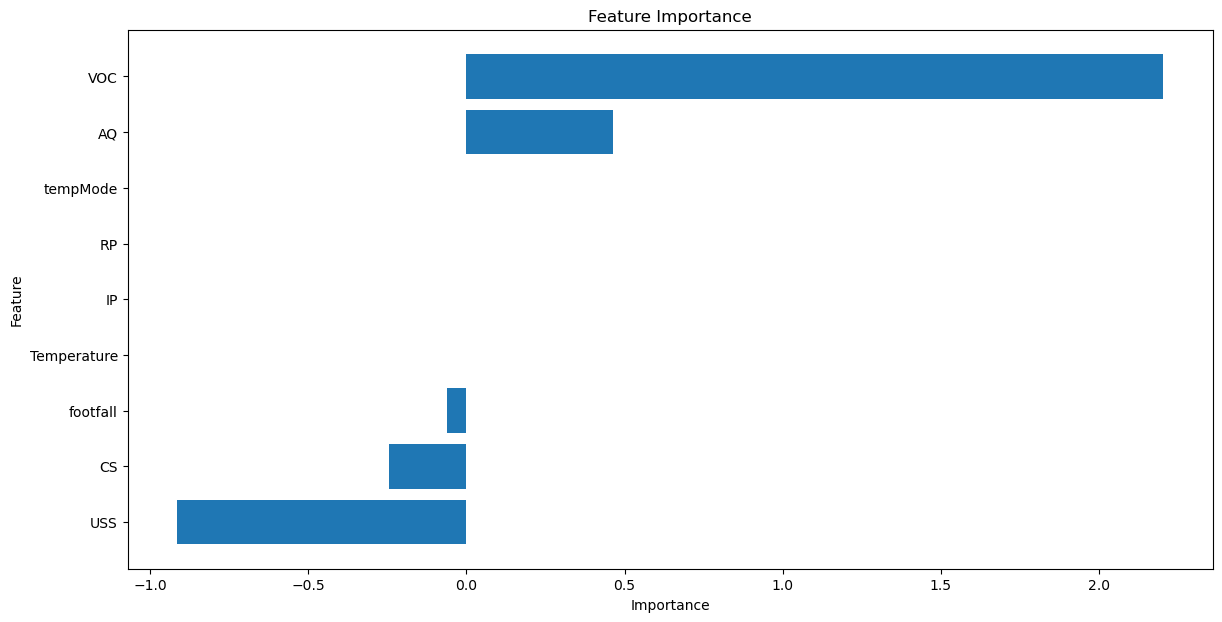

In [76]:
plt.figure(figsize=(14, 7))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

- VOC and AQ are positevely associated with machine failure prediction.
- tempMode, RP, IP, Temperature	do not impact the prediction.
- footfall, CS, USS  negatively influence failure prediction.


## Conclusion
In this project, we successfully built predictive models to forecast machine failures using sensor data. We explored various models, including Logistic Regression, Random Forest, and Gradient Boosting, and tuned their hyperparameters for optimal performance. The Logistic Regression model achieved an **accuracy of 89%**, with key features such as VOC and AQ showing significant importance in predicting machine failures.

### Key Findings:
- **VOC and AQ** are positively associated with machine failure prediction.
- **TempMode, RP, IP, and Temperature** do not significantly impact the prediction.
- **Footfall, CS, and USS** negatively influence failure prediction.